# Cybersecurity Salaries Analysis

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
import plotly.express as px
import numpy as np

## Reading and processing dataset 

## Project Summary
This project would be focused on cybersecurity salary data. The cybersecurity salary dataset provides valuable insights into the compensation landscape within the cybersecurity industry. It captures various factors such as work experience, employment type, job titles, salary in USD, employee residence, remote work ratio, company location, and company size. Analyzing this data can help answer several business questions related to cybersecurity salaries, such as understanding the salary distribution across different experience levels, identifying the most lucrative job titles, comparing compensation between different employment types, and examining the impact of company size and location on cybersecurity salaries.

## Data Dictionary
This data dictionary provides a description of each column in the "saleries" table, including the meaning and purpose of the data captured in each column.
| Column Name         | Description                                                                                      |
|----------------------|------------------------------------------------------------------------------------------------|
| work_year           | .                                       |
| experience_level    | The experience level or category of the cybersecurity professional, such as entry-level, mid-level, or senior-level. |
| employment_type     | The type of employment, such as full-time, part-time, contract, or freelance.                   |
| job_title           | The job title or position of the cybersecurity professional.                                   |
| salary           | The salary in the original currency.                                   |
| salary_currency     | The currency in which the salary is denominated.                                               |
| salary_in_usd       | The salary amount converted to United States Dollars (USD) for standardization and comparison purposes. |
| employee_residence  | The country or region where the employee resides.                                              |
| remote_ratio        | The proportion of remote work allowed in the cybersecurity position, represented as a decimal (e.g., 0.5 for 50%). |
| company_location    | The location or country where the employing company is located.                                |
| company_size        | The size or scale of the employing company, typically categorized as small, medium, or large.   |


# Step 0: Goal definition

### Problem Statement
The objective of this project is to explore and analyze the dataset on global salaries in the cybersecurity sector. We aim to identify the key factors that influence salaries and develop advanced models to predict the salary range of professionals. Additionally, we will employ clustering techniques to discover hidden patterns and use Explainable AI (XAI) methods to interpret the models' predictions.

### Project Goals
1. **Classification Task**:
    - Build Machine Learning models to predict salary ranges (low, medium, high) based on features like role, experience, location, and other relevant characteristics.
    - Evaluate model performance using appropriate metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
2. **Clustering Analysis**:
    - Apply clustering algorithms (e.g., K-Means, DBSCAN) to identify hidden patterns or groups among professionals based on their features.
    - Visualize clusters using PCA or t-SNE to explore their characteristics.
3. **Address Class Imbalance**:
    - Use techniques like SMOTE (Synthetic Minority Oversampling) or Random Undersampling to manage class imbalance, ensuring fair and robust model performance.
4. **Explainable AI (XAI)**:
    - Integrate SHAP (SHapley Additive Explanations) and LIME (Local Interpretable Model-Agnostic Explanations) to interpret the models.
    - Explain feature importance and their impact on salary predictions.
5. **Model comparison**:
    - Compare the performance of various Machine Learning algorithms:
        Logistic Regression
        Random Forest
        CatBoost
    - Analyze the effect of sampling methods on performance metrics.


### Final Deliverables
- A well-documented analysis of salary prediction using classification models.
- Insights derived from clustering analysis to identify trends and patterns in the dataset.
- Model evaluation using multiple metrics and cross-validation techniques.
- Explainable AI results to interpret model behavior and explain feature contributions.
- Visualizations and a comprehensive discussion of results, challenges, and future improvements.


# Step 1: data acquisition

In this step, we will load the dataset and verify its structure to ensure it has been correctly imported.



In [62]:
# Step 1: Data Acquisition

# Loading the dataset
file_path = "dataset/salaries.csv"  # Update the path if necessary
df = pd.read_csv(file_path)


# Step 2: data exploration

Dataset Overview:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22609 non-null  int64 
 1   experience_level    22609 non-null  object
 2   employment_type     22609 non-null  object
 3   job_title           22609 non-null  object
 4   salary              22609 non-null  int64 
 5   salary_currency     22609 non-null  object
 6   salary_in_usd       22609 non-null  int64 
 7   employee_residence  22609 non-null  object
 8   remote_ratio        22609 non-null  int64 
 9   company_location    22609 non-null  object
 10  company_size        22609 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


None

(22609, 11)

Descriptive Statistics for Numerical Features:


,work_year,salary,salary_in_usd,remote_ratio
count,22609.000000,2.260900e+04,22609.00000,22609.000000
mean,2023.656376,2.009111e+05,147521.95002,23.543722
std,0.735059,5.198490e+06,63453.23768,41.969535
min,2020.000000,1.506100e+04,15061.00000,0.000000
25%,2024.000000,1.000000e+05,100000.00000,0.000000
50%,2024.000000,1.380000e+05,138000.00000,0.000000
75%,2024.000000,1.850000e+05,184000.00000,0.000000
max,2024.000000,6.000000e+08,720000.00000,100.000000



Visualizing Numerical Features:


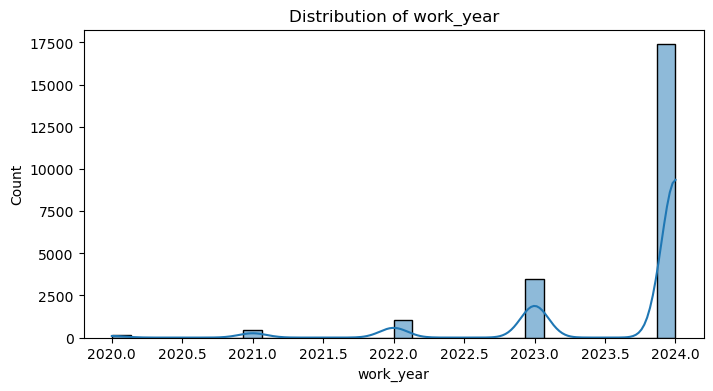

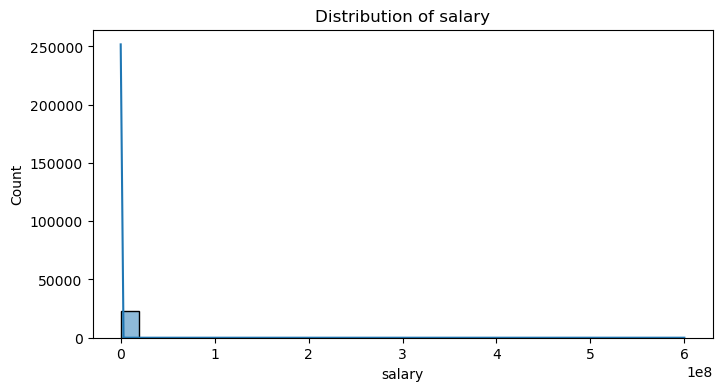

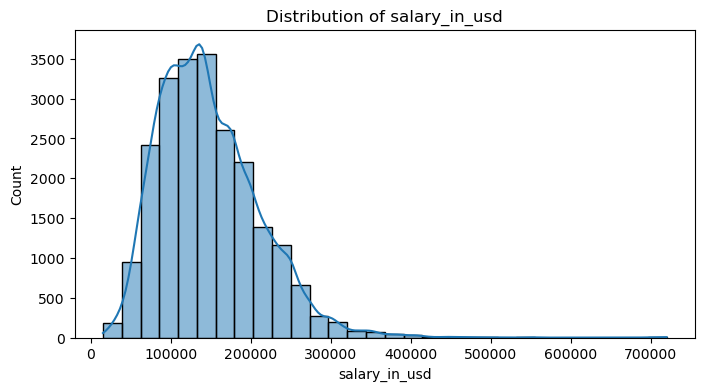

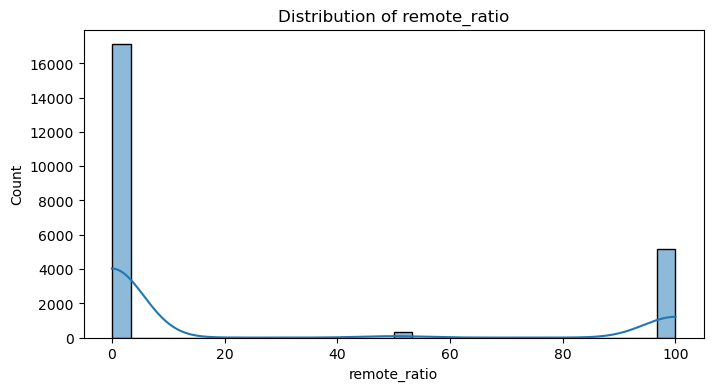

In [63]:
# Step 2: Data Exploration - Part 1


# Loading the dataset
# 1. Overview of the dataset
print("Dataset Overview:")
display(df.head())
print("\nDataset Info:")
display(df.info())
print(df.shape)

# 2. Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

# Visualizing numerical features
print("\nVisualizing Numerical Features:")

# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms for numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()




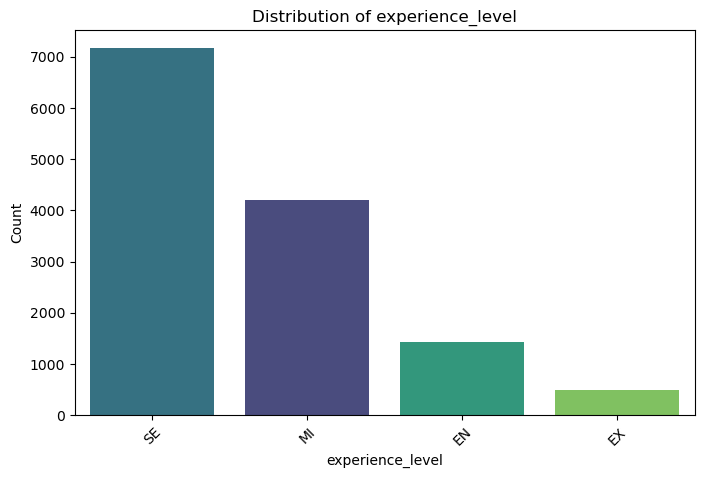

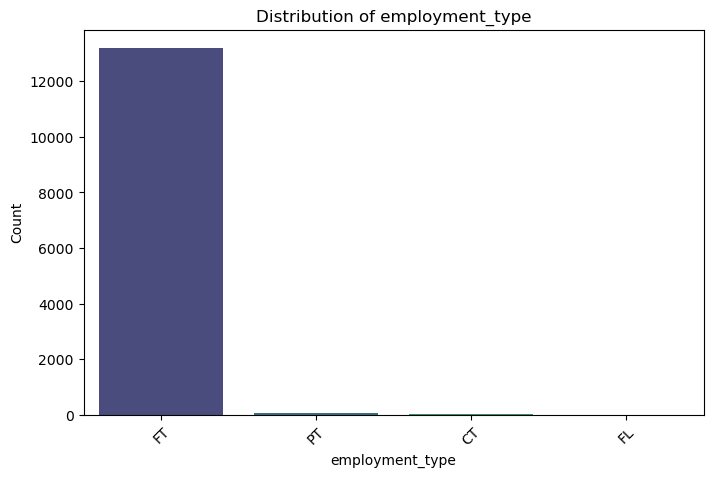

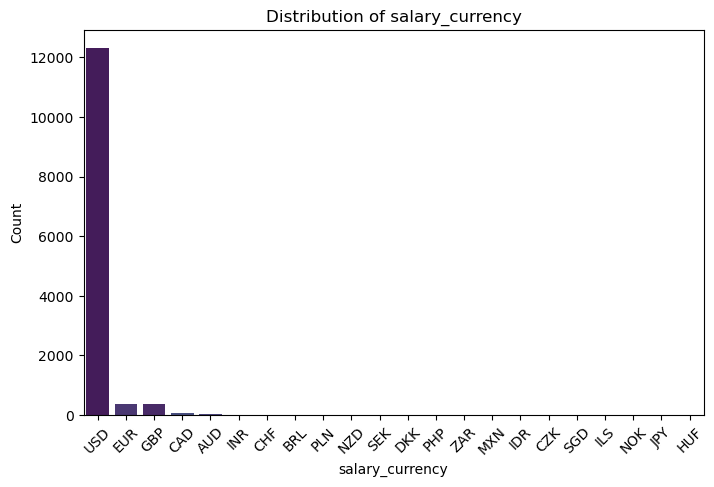

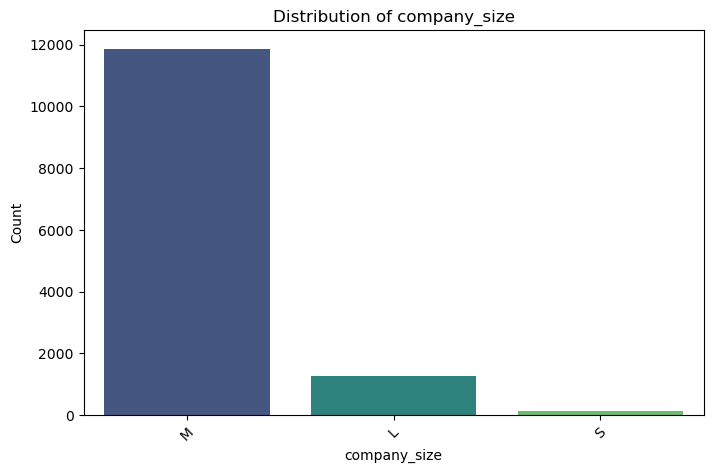

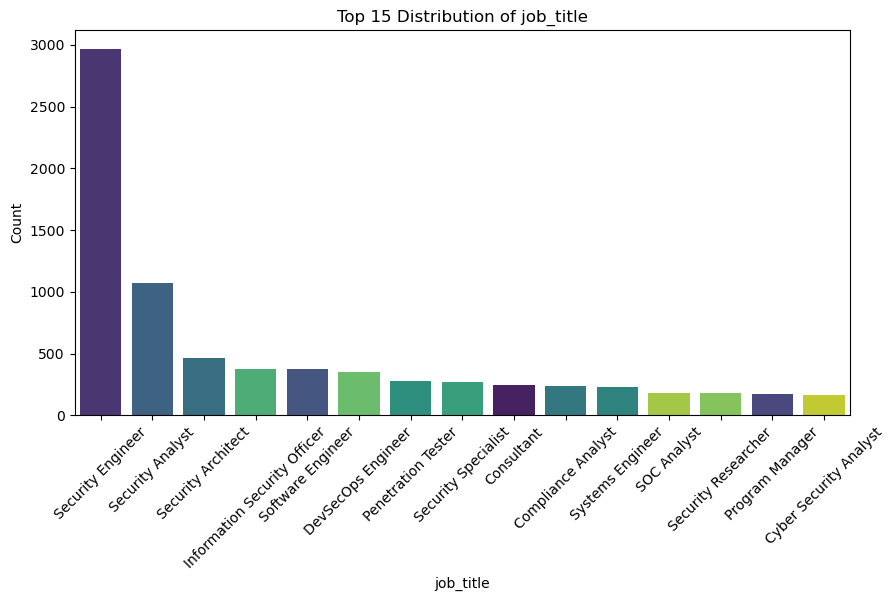

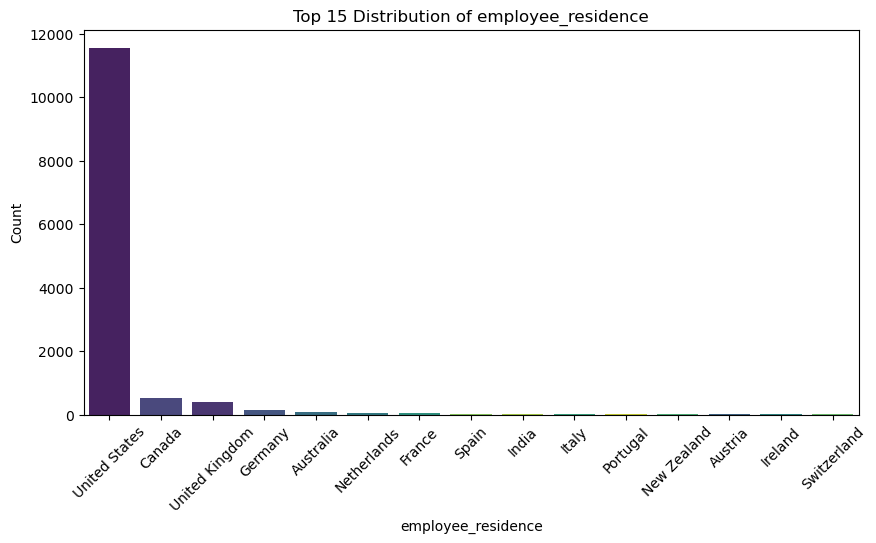

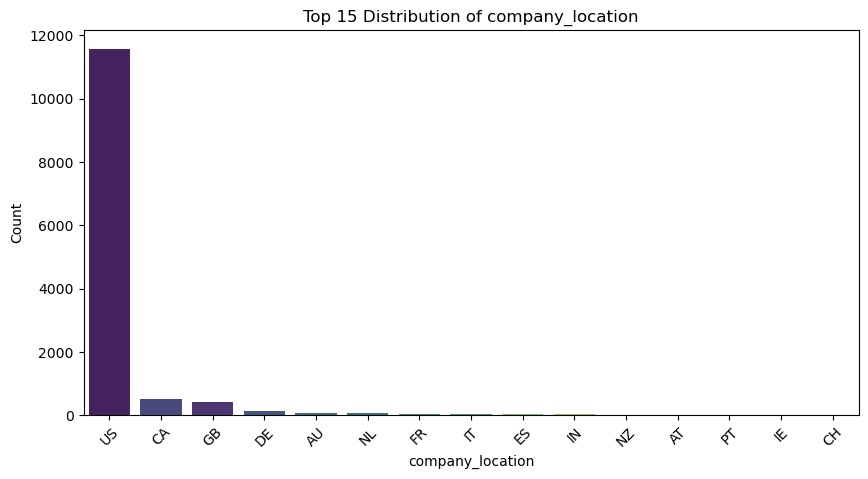


Analyzing Relationship Between Categorical Features and Salary_in_usd:


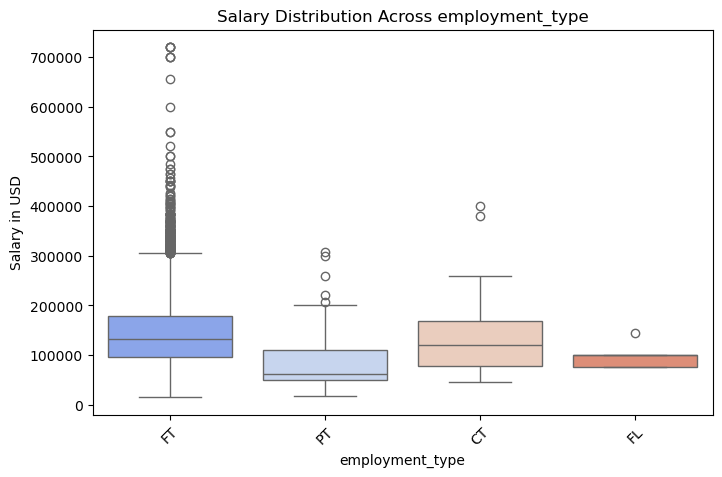

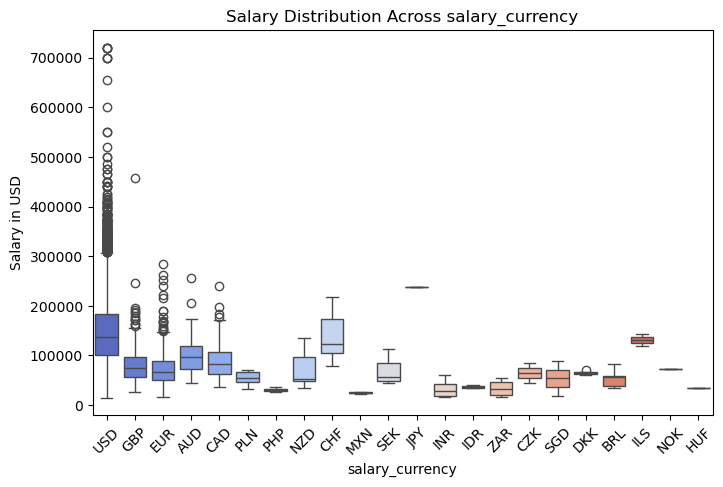

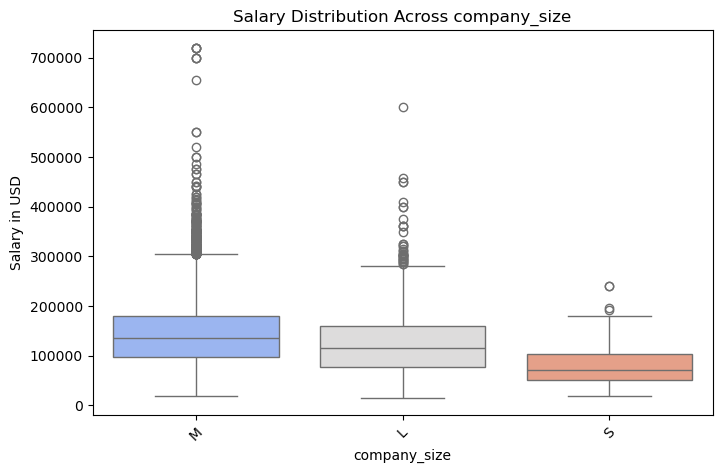

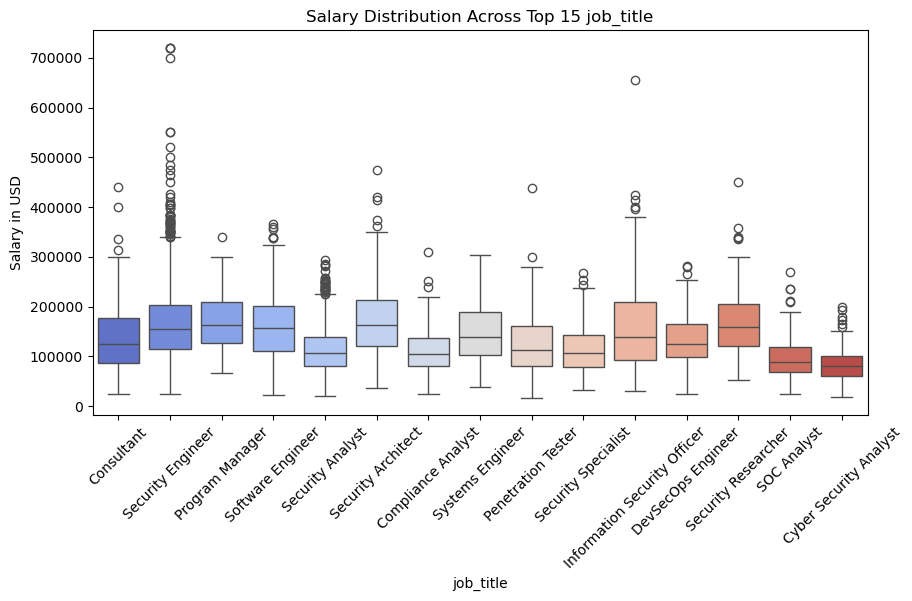

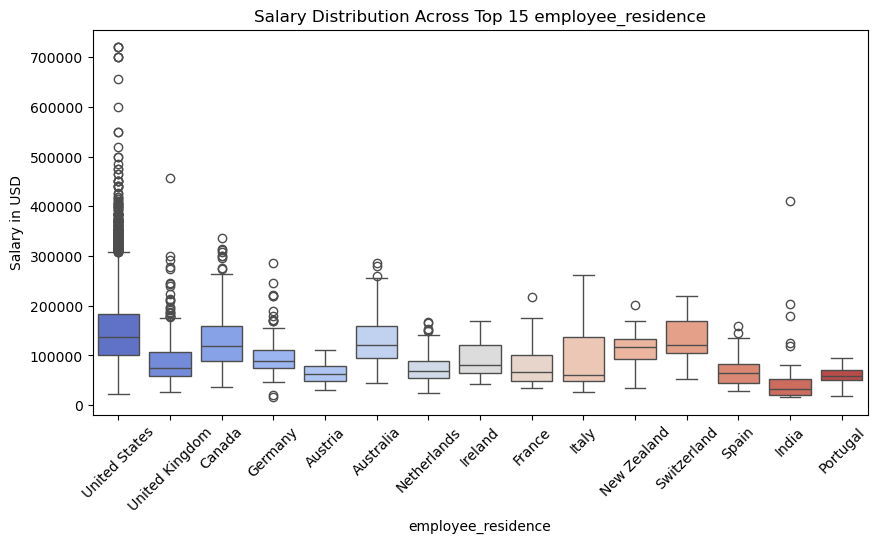

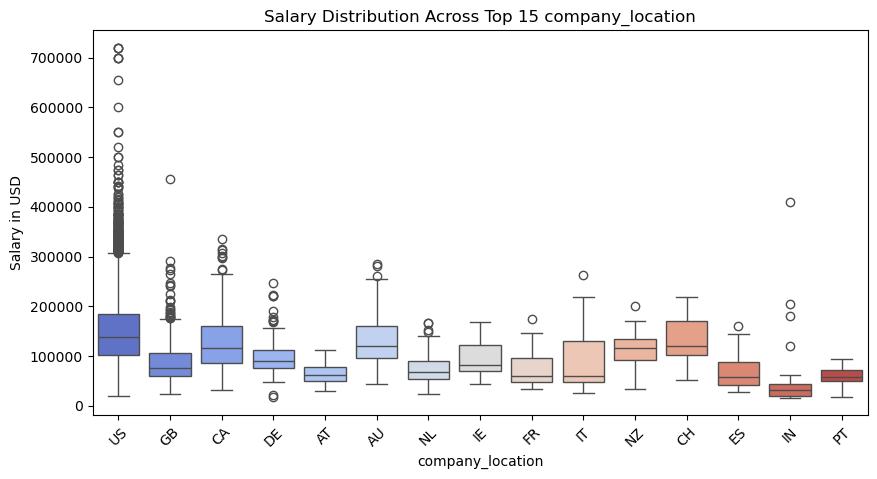

In [77]:
# Step 2: Data Exploration - Part 2 (Customized for Each Categorical Feature)

# Features to analyze
nominal_columns = ['experience_level', 'employment_type', 'job_title', 
                   'salary_currency', 'employee_residence', 'company_location', 'company_size']

# Separate features without problems and with problems of many categories
features_no_problem = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
features_problematic = ['job_title', 'employee_residence', 'company_location']

# 1. Distribution of Categorical Features

# Features without problems
for column in features_no_problem:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df, hue=column, palette='viridis', 
                  order=df[column].value_counts().index, legend=False)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Features with many categories: showing top 15
for column in features_problematic:
    top_15 = df[column].value_counts().head(15).index
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df[df[column].isin(top_15)], hue=column, palette='viridis', 
                  order=top_15, legend=False)
    plt.title(f"Top 15 Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 2. Relationship Between Categorical Features and Target Variable (salary_in_usd)
print("\nAnalyzing Relationship Between Categorical Features and Salary_in_usd:")

# Features without problems
for column in features_no_problem:
    if column == 'experience_level':
        continue
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=column, y='salary_in_usd', hue=column, data=df, palette='coolwarm', legend=False)
    plt.title(f"Salary Distribution Across {column}")
    plt.xlabel(column)
    plt.ylabel("Salary in USD")
    plt.xticks(rotation=45)
    plt.show()

# Features with many categories: showing top 15
for column in features_problematic:
    top_15 = df[column].value_counts().head(15).index
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=column, y='salary_in_usd', hue=column, data=df[df[column].isin(top_15)], 
                palette='coolwarm', legend=False)
    plt.title(f"Salary Distribution Across Top 15 {column}")
    plt.xlabel(column)
    plt.ylabel("Salary in USD")
    plt.xticks(rotation=45)
    plt.show()



1. Correlation Matrix for Numerical Features:


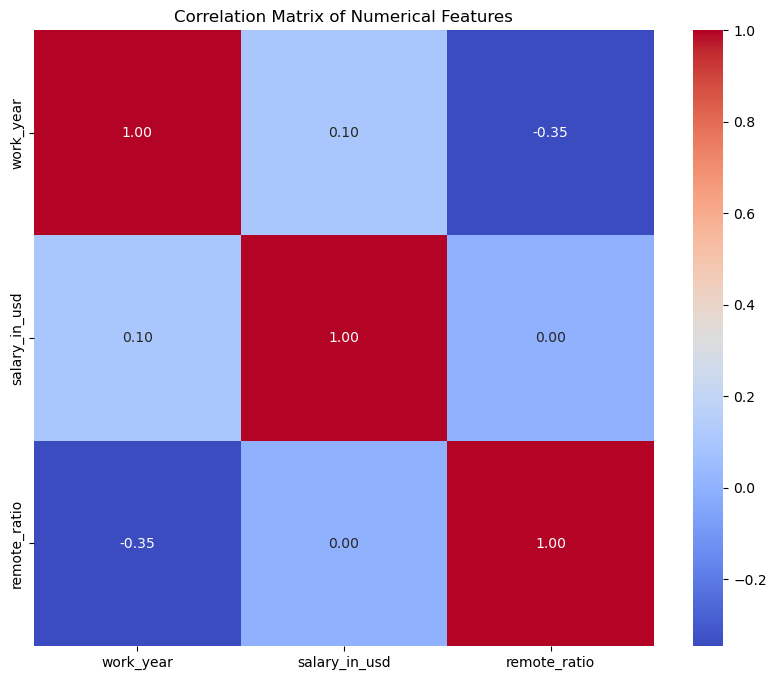


2. Outlier Detection using Boxplots:


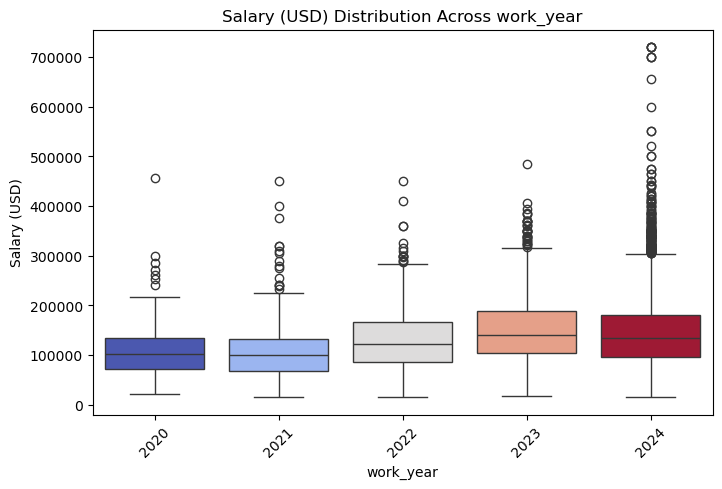

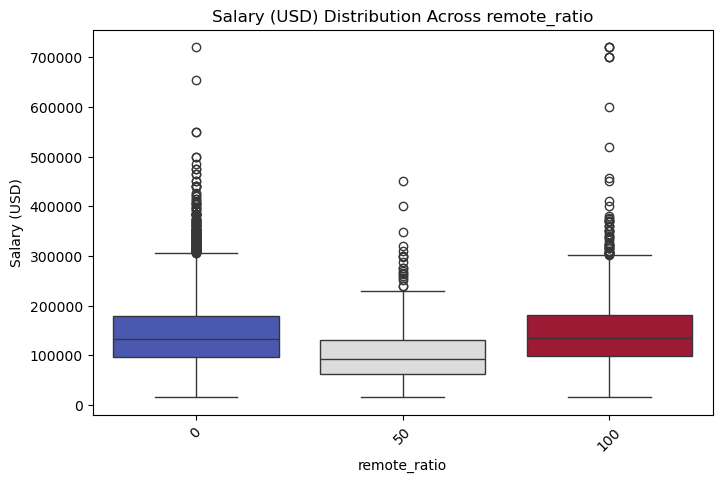


3. Scatter Plots for Numerical Features vs Salary (USD):


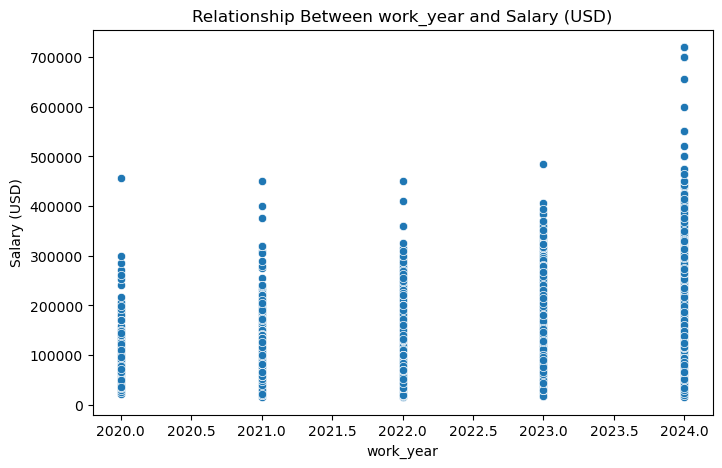

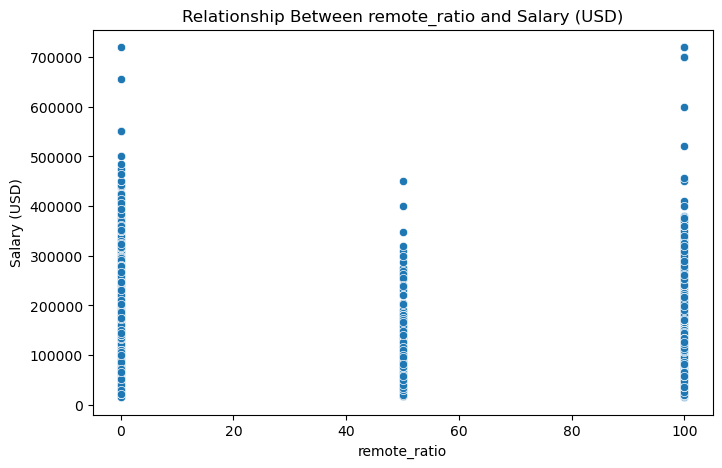

In [79]:
# Step 2: Data Exploration - Part 3

# 1. Correlation Matrix for Numerical Features
print("\n1. Correlation Matrix for Numerical Features:")

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 2. Outlier Detection using Boxplots (Numerical Features vs salary_in_usd)
print("\n2. Outlier Detection using Boxplots:")

for column in numerical_columns:
    if column == 'salary':
        continue
    if column == 'salary_in_usd':
        continue    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=column, y='salary_in_usd', data=df, hue=column, palette='coolwarm', legend=False)
    plt.title(f"Salary (USD) Distribution Across {column}")
    plt.xlabel(column)
    plt.ylabel("Salary (USD)")
    plt.xticks(rotation=45)
    plt.show()

# 3. Relationship Between Numerical Features and Target (salary_in_usd)
print("\n3. Scatter Plots for Numerical Features vs Salary (USD):")

# Scatter plots for salary_in_usd against other numerical features
if 'salary_in_usd' in df.columns:
    for column in numerical_columns:
        if column == 'salary':
            continue
        if column == 'salary_in_usd':
            continue 
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=column, y='salary_in_usd', data=df)
        plt.title(f"Relationship Between {column} and Salary (USD)")
        plt.xlabel(column)
        plt.ylabel("Salary (USD)")
        plt.show()
else:
    print("\nWarning: 'salary_in_usd' not found. Ensure dataset contains salary data.")


## Data Visualization
After a broad exploration of all the features, this step will focus only the most relevant statistics and insights to provide a clear and concise undestanding of the dataset.

In [66]:
# Create a dictionary to perform Country Mapping
country_mapping = {
    'US': 'United States',
    'BR': 'Brazil',
    'BW': 'Botswana',
    'GB': 'United Kingdom',
    'TW': 'Taiwan',
    'NL': 'Netherlands',
    'IN': 'India',
    'DE': 'Germany',
    'AE': 'United Arab Emirates',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'DK': 'Denmark',
    'CL': 'Chile',
    'ES': 'Spain',
    'SG': 'Singapore',
    'AU': 'Australia',
    'FR': 'France',
    'IT': 'Italy',
    'PK': 'Pakistan',
    'GR': 'Greece',
    'GH': 'Ghana',
    'AZ': 'Azerbaijan',
    'RO': 'Romania',
    'AR': 'Argentina',
    'DZ': 'Algeria',
    'AF': 'Afghanistan',
    'SI': 'Slovenia',
    'HR': 'Croatia',
    'SE': 'Sweden',
    'HU': 'Hungary',
    'ET': 'Ethiopia',
    'MX': 'Mexico',
    'IL': 'Israel',
    'IE': 'Ireland',
    'PL': 'Poland',
    'CR': 'Costa Rica',
    'JP': 'Japan',
    'PT': 'Portugal',
    'NG': 'Nigeria',
    'NO': 'Norway',
    'CZ': 'Czech Republic',
    'ID': 'Indonesia',
    'EE': 'Estonia',
    'KG': 'Kyrgyzstan',
    'KE': 'Kenya',
    'BG': 'Bulgaria',
    'IR': 'Iran',
    'NZ': 'New Zealand',
    'BE': 'Belgium',
    'ZA': 'South Africa',
    'AT': 'Austria',
    'LU': 'Luxembourg',
    'EG': 'Egypt',
    'VN': 'Vietnam',
    'SA': 'Saudi Arabia',
    'LT': 'Lithuania',
    'RU': 'Russia',
    'TR': 'Turkey'
}

df['employee_residence'] = df['employee_residence'].replace(country_mapping)

### What is the average salary for different cybersecurity roles?
Analyzing salary data to determine the average salaries for different cybersecurity roles also known as compensation benmarking. This information serves as a valuable tool for businesses to benchmark their own compensation packages against industry standards to attracting and retaining top talent.

In [67]:
import numpy as np
import plotly.express as px

# Top 10 average salary by job title
# Calculate the rounded average salary by job title and select the top 10 highest paid roles in ascending order
avg_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10).sort_values(ascending=True)
# Round up the average salary amounts
avg_salary_by_job_title_rounded = np.ceil(avg_salary_by_job_title)
# Create a horizontal bar chart for the top 10 highest paid roles in ascending order
fig = px.bar(
    x=avg_salary_by_job_title_rounded,
    y=avg_salary_by_job_title_rounded.index,
    color=avg_salary_by_job_title_rounded,
    labels={'x': 'Average Salary (USD)', 'y': 'Job Title'},
    text=avg_salary_by_job_title_rounded,
    orientation='h',
    template='seaborn',
    title='<b>Top 10 Highest Paid Roles in Cyber Security (Ascending Order)</b>'
)
fig.show()

# Bottom 10 average salary by job title
# Calculate the rounded average salary by job title and select the bottom 10 least paid roles in descending order
avg_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().nsmallest(10).sort_values(ascending=True)
# Round up the average salary amounts
avg_salary_by_job_title_rounded = np.ceil(avg_salary_by_job_title)
# Create a horizontal bar chart for the bottom 10 least paid roles in descending order
fig = px.bar(
    x=avg_salary_by_job_title_rounded,
    y=avg_salary_by_job_title_rounded.index,
    color=avg_salary_by_job_title_rounded,
    labels={'x': 'Average Salary (USD)', 'y': 'Job Title'},
    text=avg_salary_by_job_title_rounded,
    orientation='h',
    template='seaborn',
    title='<b>Bottom 10 Least Paid Roles in Cyber Security</b>'
)
fig.show()


### Salary Distribution by Experience Level
Examining salary data based on experience levels and seniority within the cybersecurity field can help businesses understand the relationship between years of experience and compensation. This analysis can inform decisions related to career progression, promotions, and salary structures within an organization.



In [68]:
salary_distribution_by_experience = px.box(df, x='experience_level', y='salary_in_usd', color='experience_level',
             labels={'experience_level': 'Experience Level', 'salary_in_usd': 'Salary (USD)'},
             title='Salary Distribution by Experience Level')

salary_distribution_by_experience.show()

### Regional Salary Disparity
By examining salary data across different geographical regions, you can identify any regional disparities in cybersecurity salaries. This analysis can help businesses understand the impact of location on compensation and make informed decisions when expanding their operations or considering remote work policies

In [70]:
import plotly.express as px

# Calculate the average salaries by employee residence
avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

# Create a choropleth map
fig_choropleth = px.choropleth(avg_salary_by_residence, locations='employee_residence', locationmode='country names',
                               color='salary_in_usd', title='Regional Salary Disparity',
                               color_continuous_scale='RdYlBu', labels={'salary_in_usd': 'Average Salary (USD)'})

# Update the layout of the choropleth map
fig_choropleth.update_layout(geo=dict(showframe=False, showcoastlines=False))

# Show the choropleth map
fig_choropleth.show()

### Salary Trends Over Time
By analyzing salary data over time, you can identify trends and patterns in compensation within the cybersecurity field. This analysis can help businesses anticipate changes in salary expectations and adjust their recruitment and retention strategies accordingly.

In [71]:
# Salary Trends Over Time

year_based_salary = df['salary_in_usd'].groupby(df['work_year']).mean()

salary_trend_graph = px.line(x=['2020', '2021', '2022', '2023', '2024'], y=year_based_salary.values, labels={'x': 'Work Year', 'y': 'Salary'},title='Salary Trends Over Time')

salary_trend_graph.show()

### Remote Work and Salary
By performing analysis based on remote work and salary in relation to employees' location, companies can gain valuable insights to optimize remote work policies, ensure fair compensation, attract top talent, and make data-driven decisions related to resource allocation and cost management.

In [72]:
# Remote Work and Salary based on employees location
remote_work_viz = px.choropleth(df, locations='employee_residence', locationmode='country names',
                    color='remote_ratio', hover_data=['salary_in_usd'],
                    labels={'remote_ratio': 'Remote Work Ratio', 'salary_in_usd': 'Salary (USD)'},
                    title='Remote Work and Salary by Employee Residence')

remote_work_viz.show()

# Step 3: Data pre-processing

## Data cleaning 

In [73]:
# Part 1: Data Cleaning

# 1. Check for Duplicates
print("\nChecking for Duplicates...")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates if any
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

# 2. Check for Missing Values
print("\nChecking for Missing Values...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Imputation or Removal of Missing Values
# Strategy: Drop rows or Impute with mean/median
columns_with_null = missing_values[missing_values > 0].index
for column in columns_with_null:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
        print(f"Missing values in '{column}' filled with median.")
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
        print(f"Missing values in '{column}' filled with mode.")

# Final Check for Missing Values
print("\nFinal Check for Missing Values:")
print(df.isnull().sum())



Checking for Duplicates...
Number of duplicate rows: 9333
Duplicate rows removed.

Checking for Missing Values...
Series([], dtype: int64)

Final Check for Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [74]:
unique_employee_residence = df['employee_residence'].nunique()
print("Number of unique employee residence:", unique_employee_residence)

unique_job_titles = df['job_title'].nunique()
print("Number of unique job titles:", unique_job_titles)

#Check for negative salaries 
negative_salaries = df[df['salary_in_usd'] < 0]
print("Negative Salaries:")
print(negative_salaries)

#Check for data range Check for salaries outside a specific range
salary_range = (1000, 1000000)
out_of_range_salaries = df[(df['salary_in_usd'] < salary_range[0]) | (df['salary_in_usd'] > salary_range[1])]
print("Out of Range Salaries:")
print(out_of_range_salaries)

Number of unique employee residence: 79
Number of unique job titles: 254
Negative Salaries:
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []
Out of Range Salaries:
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [75]:
# Drop the 'salary' column because we will only use salary_in_usd for this analysis
df = df.drop('salary', axis=1)

# Print the updated DataFrame
df.head()


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,USD,211000,United States,0,US,M
1,2024,MI,FT,Security Consultant,USD,142000,United States,0,US,M
2,2024,MI,FT,Security Consultant,GBP,80521,United Kingdom,0,GB,M
3,2024,MI,FT,Security Consultant,GBP,65730,United Kingdom,0,GB,M
4,2024,MI,FT,Consultant,USD,188400,United States,0,US,M
